# Logistic regression by gradient descent

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Synthesize training data

In [10]:
m = 200
X = np.random.randn(2,m)
W_true = np.array([-2/3, 2]).reshape(2,1)
b_true = np.array(1/7)
noise = np.random.randn(1,m)/5
Y = (W_true.T @ X + b_true) + noise > 0

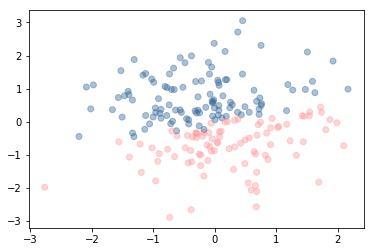

In [11]:
colors = ['#33669966' if y else '#FF999966' for y in Y[0]]
plt.scatter(X[0], X[1], color=colors)

In [12]:
W = np.random.randn(2,1)
b = np.zeros((1))

In [14]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

[[0.70907446]] 114


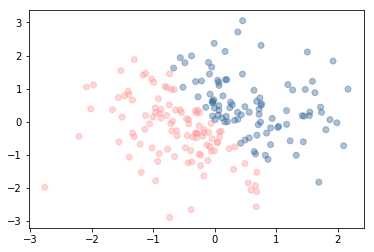

In [15]:
A = sigmoid(W.T @ X + b)
log_loss = -(Y @ np.log(A).T + (1-Y) @ np.log(1-A).T)/m
print(log_loss, np.sum((A > 0.5) == Y))

colors = ['#33669966' if y > 0.5 else '#FF999966' for y in A[0]]
plt.scatter(X[0], X[1], color=colors)

### Train by Gradient Descent

In [16]:
learning_rate = 0.1
num_iterations = 1000
costs = []
for i in range(num_iterations):
    Z = W.T @ X + b
    A = sigmoid(Z)
    log_loss = -(Y @ np.log(A).T + (1-Y) @ np.log(1-A).T)/m
    costs.append(log_loss)
    dZ = A - Y
    db = np.sum(dZ)/m
    dW = (X @ dZ.T) / m
    W -= learning_rate * dW
    b -= learning_rate * db

[[0.1275296]] 195


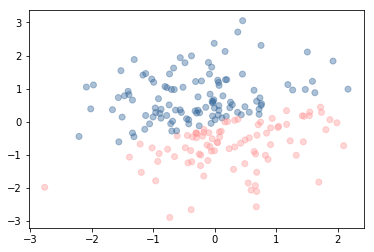

In [17]:
A = sigmoid(W.T @ X + b)
log_loss = -(Y @ np.log(A).T + (1-Y) @ np.log(1-A).T)/m
print(log_loss, np.sum((A > 0.5) == Y))

colors = ['#33669966' if y > 0.5 else '#FF999966' for y in A[0]]
plt.scatter(X[0], X[1], color=colors)

### Test

In [18]:
X_test = np.random.randn(2,m)
noise = np.random.randn(1,m)/5
Y_test = (W_true.T @ X_test + b_true) + noise > 0

[[1.7909321]] 195


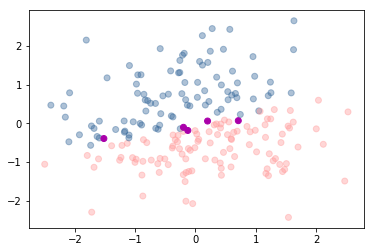

In [19]:
A = sigmoid(W.T @ X_test + b)
log_loss = -(Y @ np.log(A).T + (1-Y) @ np.log(1-A).T)/m
print(log_loss, np.sum((A > 0.5) == Y_test))

colors = [('#33669966' if a>0.5 else '#FF999966')
          if (a>0.5)==y else '#aa00aa' for a,y in zip(A[0],Y_test[0])]
plt.scatter(X_test[0], X_test[1], color=colors)